In [1]:
import threading
import time
from rich.console import Console
from rich.logging import RichHandler
import logging
import websocket

import requests
import websocket
import json
import time
import os
from dotenv import load_dotenv
from urllib.parse import urlencode
import hmac
import hashlib
import copy

In [2]:
real_time_prices = []

def run_websocket():
    global real_time_prices
    def on_message(ws, message):
        global real_time_prices
        message_ = json.loads(message)
        real_time_prices.append({"t": message_['T'], "p":message_['p']})


    ws = websocket.WebSocketApp("wss://fstream.binance.com/ws/1000pepeusdc@aggTrade", on_message=on_message)

    ws.run_forever()


In [3]:
websocket_thread = threading.Thread(target=run_websocket)
websocket_thread.start()


In [43]:
prices = copy.deepcopy(real_time_prices)

In [72]:
len(prices)

20074

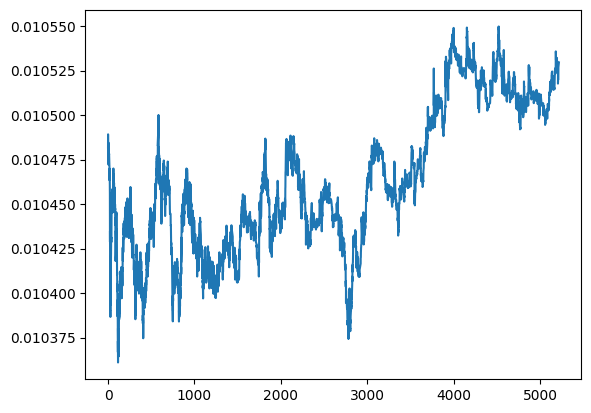

In [45]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot([(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices], [float(x['p']) for x in prices])

In [46]:
prices_list = [float(x['p']) for x in prices]
time_list= [(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices]


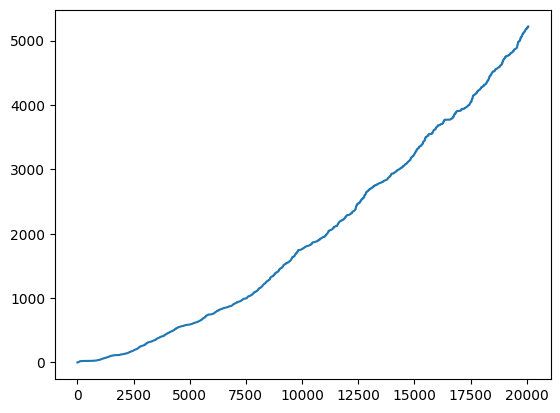

In [47]:
plt.plot(time_list)

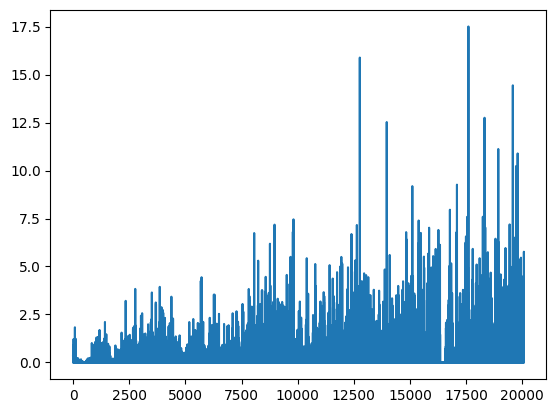

In [48]:
plt.plot([(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))])

In [49]:
[num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]]

[0.343,
 0.25199999999999995,
 0.0,
 0.0030000000000000027,
 0.0020000000000000018,
 0.0,
 0.0010000000000000009,
 0.061000000000000054,
 0.0,
 0.743,
 0.06899999999999995,
 0.04800000000000004,
 0.006000000000000005,
 0.010999999999999899,
 0.061000000000000165,
 0.0,
 0.8929999999999998,
 0.0040000000000000036,
 0.28000000000000025,
 0.2330000000000001,
 0.3259999999999996,
 0.5960000000000001,
 0.1469999999999998,
 0.023000000000000576,
 0.08499999999999996,
 1.2199999999999998,
 0.012000000000000455,
 0.0029999999999992255,
 0.0,
 0.008000000000000007,
 0.0,
 0.37100000000000044,
 0.2370000000000001,
 0.0,
 0.0009999999999994458,
 0.0,
 0.0,
 0.0,
 0.004000000000000448,
 0.0,
 0.0,
 0.0039999999999995595,
 0.001000000000000334,
 0.0129999999999999,
 0.052999999999999936,
 0.0,
 0.0,
 0.002000000000000668,
 0.40700000000000003,
 0.0039999999999995595,
 0.009999999999999787,
 0.12699999999999978,
 0.0,
 0.0,
 0.0,
 0.009000000000000341,
 0.21799999999999997,
 0.6440000000000001,
 0.1

(array([1.5525e+04, 1.1030e+03, 7.1900e+02, 4.9300e+02, 4.0000e+02,
        3.0000e+02, 2.5400e+02, 1.9000e+02, 1.4500e+02, 1.4800e+02,
        1.0900e+02, 1.0200e+02, 7.7000e+01, 7.2000e+01, 5.5000e+01,
        4.2000e+01, 3.9000e+01, 3.1000e+01, 3.7000e+01, 2.6000e+01,
        3.3000e+01, 1.9000e+01, 1.6000e+01, 9.0000e+00, 1.4000e+01,
        1.3000e+01, 1.2000e+01, 7.0000e+00, 9.0000e+00, 6.0000e+00,
        4.0000e+00, 1.1000e+01, 4.0000e+00, 5.0000e+00, 2.0000e+00,
        8.0000e+00, 2.0000e+00, 3.0000e+00, 6.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

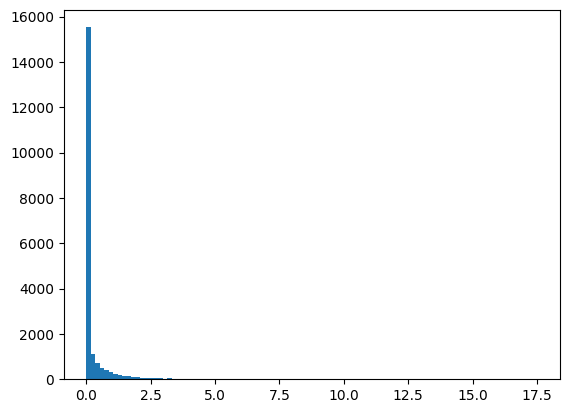

In [50]:

plt.hist(  [num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]] , bins=100)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        5.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 1.400e+01, 1.500e+01,
        1.700e+01, 2.000e+01, 2.100e+01, 3.300e+01, 4.200e+01, 4.300e+01,
        5.300e+01, 1.030e+02, 6.900e+01, 9.700e+01, 1.520e+02, 2.560e+02,
        2.700e+02, 3.210e+02, 8.430e+02, 1.026e+03, 9.690e+02, 2.791e+03,
        5.727e+03, 2.794e+03, 9.890e+02, 9.840e+02, 7.780e+02, 3.290e+02,
        2.970e+02, 2.560e+02, 1.850e+02, 9.000e+01, 9.800e+01, 8.500e+01,
        4.200e+01, 4.400e+01, 3.100e+01, 4.000e+01, 2.100e+01, 2.500e+01,
        9.000e+00, 7.000e+00, 4.000e+00, 1.500e+01, 4.000e+00, 4.000e+00,
        6.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 1.000e+0

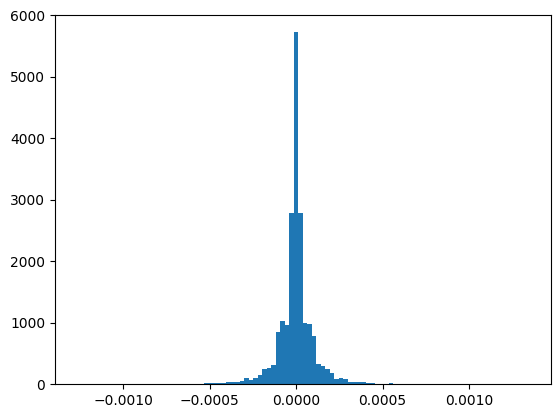

In [51]:
plt.hist([(prices_list[i] / prices_list[i - 1] - 1) for i in range(1, len(prices_list))], bins=100)

In [52]:
data = [[(float(x['t']) - float(prices[0]['t'])) * 10**(-3) , float(x['p'])]for x in prices]

In [53]:
# 计算价格变化达到2%所需的时间
result = []

# 遍历每个时间点
for i in range(len(data)):
    start_time, start_price = data[i]
    found = False
    
    # 遍历后续时间点
    for j in range(i + 1, len(data)):
        current_time, current_price = data[j]
        
        # 计算价格变化百分比
        price_change = (current_price - start_price) / start_price
        
        # 检查价格变化是否达到2%
        if abs(price_change) >= 0.0015:
            time_diff = current_time - start_time
            result.append([start_time, start_price, time_diff])
            found = True
            break
    
    # 如果在后续时间点中没有找到达到2%的变化
    if not found:
        result.append([start_time, start_price, None])


(array([9.090e+02, 1.769e+03, 1.667e+03, 1.463e+03, 1.378e+03, 1.309e+03,
        9.860e+02, 7.900e+02, 7.830e+02, 7.760e+02, 7.050e+02, 6.660e+02,
        6.040e+02, 3.390e+02, 3.510e+02, 3.610e+02, 2.960e+02, 3.380e+02,
        2.830e+02, 2.870e+02, 3.020e+02, 2.550e+02, 2.210e+02, 2.570e+02,
        1.890e+02, 1.330e+02, 1.580e+02, 1.690e+02, 1.540e+02, 9.000e+01,
        7.800e+01, 1.030e+02, 9.600e+01, 1.180e+02, 1.510e+02, 7.200e+01,
        9.300e+01, 5.800e+01, 7.600e+01, 7.000e+01, 1.060e+02, 8.800e+01,
        6.900e+01, 8.300e+01, 3.700e+01, 7.100e+01, 4.500e+01, 5.800e+01,
        4.800e+01, 3.400e+01, 6.300e+01, 5.800e+01, 4.000e+01, 2.000e+01,
        3.700e+01, 5.200e+01, 5.900e+01, 2.300e+01, 3.000e+00, 1.700e+01,
        1.200e+01, 1.400e+01, 2.000e+00, 3.000e+00, 7.000e+00, 3.000e+00,
        4.000e+00, 9.000e+00, 2.000e+00, 6.000e+00, 5.000e+00, 3.000e+00,
        3.000e+00, 7.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 9.000e+00,
        6.000e+00, 0.000e+00, 0.000e+0

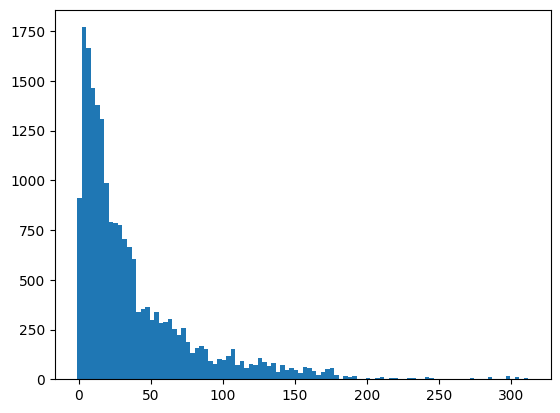

In [54]:
plt.hist([-1 if x is None else x for x in np.array(result)[:,-1]], bins=100)

In [55]:
price_list = prices_list

In [56]:
result = []


# 遍历每个价格
for i in range(len(prices)):
    start_time = float(prices[i]['t'])
    start_price = float(prices[i]['p'])
    trend_up = None
    step_count = 0
    total_percentage_change = 0
    duration = 0  # 初始化持续时间
    
    # 遍历后续价格
    for j in range(i + 1, len(prices)):
        current_time = float(prices[j]['t'])
        current_price = float(prices[j]['p'])
        percentage_change = (current_price - start_price) / start_price
        
        # 如果趋势未定义，定义初始趋势
        if trend_up is None:
            trend_up = percentage_change > 0
        
        # 检查趋势是否反转
        if (percentage_change > 0 and trend_up) or (percentage_change < 0 and not trend_up):
            step_count += 1
            duration = current_time - start_time  # 计算持续时间
            total_percentage_change = (current_price - start_price) / start_price
        else:
            break
    
    result.append([start_time, start_price, step_count, duration * 10**(-3), total_percentage_change])


In [57]:
np.mean(np.array(result)[:, -1])

7.82779107852229e-05

(array([1.0000e+00, 1.0000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00,
        3.0000e+00, 2.8000e+01, 1.0700e+02, 4.8000e+02, 2.4640e+03,
        1.3232e+04, 2.9500e+03, 4.8800e+02, 9.0000e+01, 1.5000e+01,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 6.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 5.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00,
        7.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.00

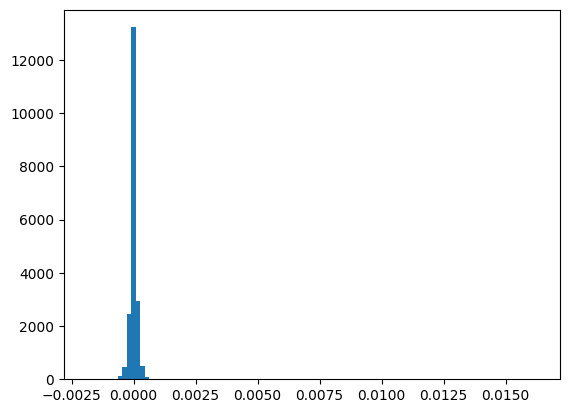

In [58]:
plt.hist(np.array(result)[:, -1], bins= 100)

(array([  10.,   13.,    8.,    7.,   15.,   19.,   10.,   18.,   23.,
          13.,   16.,   24.,   33.,   18.,   18.,   28.,   26.,   24.,
          31.,   31.,   48.,   53.,   58.,   64.,   52.,   60.,   84.,
          98.,  101.,  102.,  120.,  128.,  148.,  136.,  155.,  174.,
         189.,  227.,  248.,  284.,  339.,  328.,  406.,  458.,  543.,
         604.,  722.,  780., 1045., 1590.,  358., 2640.,  777.,  644.,
         595.,  556.,  448.,  390.,  342.,  367.,  281.,  249.,  228.,
         179.,  169.,  153.,  137.,  131.,  131.,  121.,   93.,   92.,
          91.,   69.,   71.,   82.,   68.,   53.,   68.,   39.,   31.,
          36.,   31.,   21.,   27.,   19.,   19.,   22.,   22.,   18.,
          13.,    9.,   11.,   10.,   12.,   12.,    9.,    6.,    8.,
           9.]),
 array([-4.99625281e-04, -4.89643123e-04, -4.79660965e-04, -4.69678807e-04,
        -4.59696649e-04, -4.49714491e-04, -4.39732333e-04, -4.29750175e-04,
        -4.19768017e-04, -4.09785859e-04, -3.99803

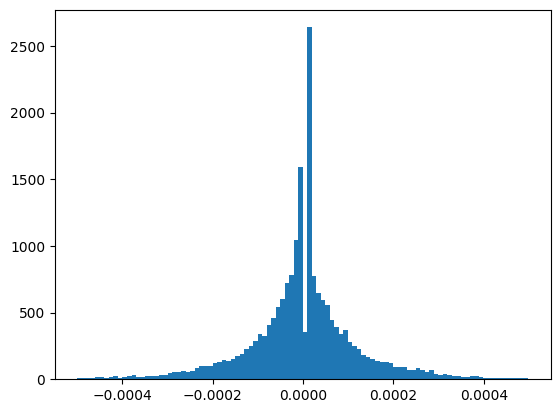

In [59]:
plt.hist([num for num in np.array(result)[:, -1] if -0.0005 <= num <= 0.0005], bins=100)

(array([3523.,    0.,  239.,    0.,  171.,    0.,  177.,    0.,  124.,
           0.,   82.,    0.,   62.,    0.,   62.,    0.,   63.,    0.,
          46.,    0.,   40.,    0.,   43.,    0.,   42.,    0.,   24.,
           0.,   45.,    0.,   21.,    0.,   31.,    0.,   37.,    0.,
          34.,    0.,   13.,    0.,   26.,    0.,   30.,    0.,   22.,
           0.,   22.,    0.,   18.,    0.,    0.,   17.,    0.,   26.,
           0.,    9.,    0.,   20.,    0.,   13.,    0.,   20.,    0.,
          11.,    0.,   20.,    0.,   23.,    0.,    5.,    0.,   20.,
           0.,   18.,    0.,   11.,    0.,   20.,    0.,    7.,    0.,
           9.,    0.,   27.,    0.,   10.,    0.,    9.,    0.,   11.,
           0.,   29.,    0.,   10.,    0.,    8.,    0.,   22.,    0.,
          11.]),
 array([0.     , 0.00049, 0.00098, 0.00147, 0.00196, 0.00245, 0.00294,
        0.00343, 0.00392, 0.00441, 0.0049 , 0.00539, 0.00588, 0.00637,
        0.00686, 0.00735, 0.00784, 0.00833, 0.00882, 0.00931

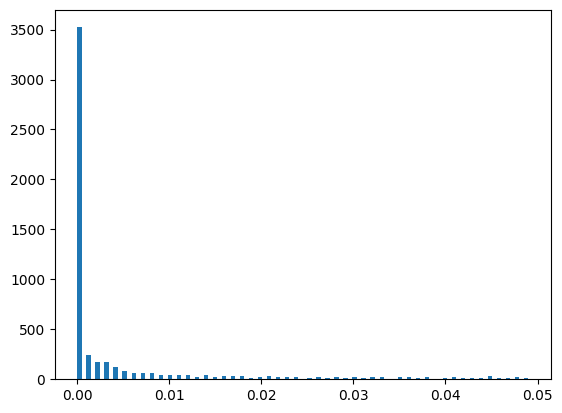

In [60]:
plt.hist([num for num in np.array(result)[:, 3] if num < 0.05], bins=100)

(array([ 358., 2687., 1731., 1323., 1036.,  863.,  726.,  635.,  559.,
         481.,  419.,  369.,  300.,  275.,  268.,  253.,  223.,  204.,
         177.,  169.,  171.,  151.,  136.,  108.,  121.,  111.,  113.,
         107.,  107.,   97.,  101.,  107.,   93.,   82.,   82.,   79.,
          68.,   67.,   73.,   58.,   54.,   54.,   53.,   57.,   53.,
          59.,   54.,   62.,   50.,   61.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22, 39.2 , 40.18, 41.16, 42.14, 43.12,
        44.1 , 45.08, 46.06, 47.04, 48.02, 49.  ]),
 <BarContainer object of 50 artists>)

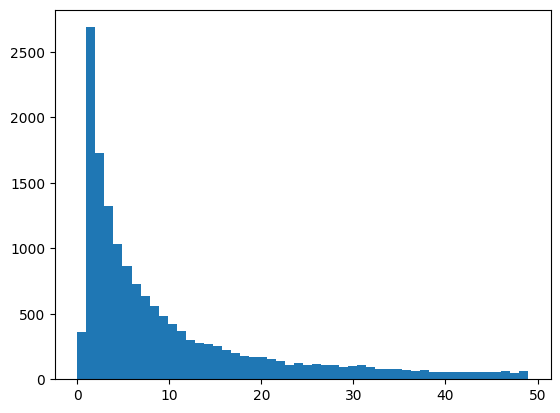

In [61]:
plt.hist([num for num in np.array(result)[:, 2] if num < 50], bins=50)

In [62]:
# 要多少时间才能达成一次网格交易
amplitude_threshold = 0.0005
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)
    found_high = False
    found_low = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)

        price_change = ((current_price - start_price) / start_price) 

        if price_change >= amplitude_threshold:
            found_high = True
        if price_change <= -amplitude_threshold:
            found_low = True

        if found_high and found_low:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            break

    if not (found_high and found_low):
        durations.append({'start_time': start_time, 'duration': None})


In [63]:
durations

[{'start_time': 1719207055.491, 'duration': 5.422000169754028},
 {'start_time': 1719207055.834, 'duration': 580.7339999675751},
 {'start_time': 1719207056.086, 'duration': 581.2560000419617},
 {'start_time': 1719207056.086, 'duration': 581.2560000419617},
 {'start_time': 1719207056.089, 'duration': 581.2530000209808},
 {'start_time': 1719207056.091, 'duration': 581.2509999275208},
 {'start_time': 1719207056.091, 'duration': 581.2509999275208},
 {'start_time': 1719207056.092, 'duration': 583.3519999980927},
 {'start_time': 1719207056.153, 'duration': 583.2909998893738},
 {'start_time': 1719207056.153, 'duration': 583.2909998893738},
 {'start_time': 1719207056.8960001, 'duration': 577.3899998664856},
 {'start_time': 1719207056.9650002, 'duration': 577.1159999370575},
 {'start_time': 1719207057.013, 'duration': 577.0390000343323},
 {'start_time': 1719207057.019, 'duration': 577.0329999923706},
 {'start_time': 1719207057.03, 'duration': 4.503999948501587},
 {'start_time': 1719207057.091, '

In [64]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [65]:
# 单边需要多少时间达到阈值
threshold = 0.002
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)
    found = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)

        price_change = ((current_price - start_price) / start_price)

        if abs(price_change) >= threshold:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            found = True
            break

    if not found:
        durations.append({'start_time': start_time, 'duration': None})



In [66]:
durations

[{'start_time': 1719207055.491, 'duration': 21.19700002670288},
 {'start_time': 1719207055.834, 'duration': 16.70299983024597},
 {'start_time': 1719207056.086, 'duration': 16.28600001335144},
 {'start_time': 1719207056.086, 'duration': 16.284000158309937},
 {'start_time': 1719207056.089, 'duration': 16.2810001373291},
 {'start_time': 1719207056.091, 'duration': 16.266000032424927},
 {'start_time': 1719207056.091, 'duration': 16.266000032424927},
 {'start_time': 1719207056.092, 'duration': 16.265000104904175},
 {'start_time': 1719207056.153, 'duration': 16.203999996185303},
 {'start_time': 1719207056.153, 'duration': 16.203999996185303},
 {'start_time': 1719207056.8960001, 'duration': 19.79099988937378},
 {'start_time': 1719207056.9650002, 'duration': 19.823999881744385},
 {'start_time': 1719207057.013, 'duration': 19.77999997138977},
 {'start_time': 1719207057.019, 'duration': 19.7739999294281},
 {'start_time': 1719207057.03, 'duration': 19.772000074386597},
 {'start_time': 1719207057.

In [67]:
threshold = 0.001
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)
    found_up = False
    found_down = False

    up_duration = None
    down_duration = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)

        price_change = ((current_price - start_price) / start_price)

        if not found_up and price_change >= threshold:
            up_duration = current_time - start_time
            found_up = True

        if not found_down and price_change <= -threshold:
            down_duration = current_time - start_time
            found_down = True

        if found_up and found_down:
            break

    durations.append({'start_time': start_time, 'up_duration': up_duration, 'down_duration': down_duration})


In [71]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [69]:
# 定义阈值
initial_threshold = 0.0003  # 万分之三
final_threshold = 0.001  # 千分之一

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) * 10**(-3)

    # 初始化标志和变量
    found_initial = False
    initial_time = None
    initial_price = None
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) * 10**(-3)
        price_change = ((current_price - start_price) / start_price)

        if not found_initial:
            if price_change >= initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'up'
            elif price_change <= -initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'down'
        else:
            if direction == 'up':
                final_price_change = ((current_price - initial_price) / initial_price)
                if final_price_change >= final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif final_price_change <= -initial_threshold:
                    found_initial = False
            elif direction == 'down':
                final_price_change = ((current_price - initial_price) / initial_price)
                if final_price_change <= -final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif final_price_change >= initial_threshold:
                    found_initial = False

    if not found_initial or (found_initial and (direction == 'up' and final_price_change < final_threshold) or (direction == 'down' and final_price_change > -final_threshold)):
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [70]:
durations

[{'start_time': 1719207055.491,
  'duration': 6.081000089645386,
  'direction': 'down'},
 {'start_time': 1719207055.834,
  'duration': 7.88100004196167,
  'direction': 'down'},
 {'start_time': 1719207056.086,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.086,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.089,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.091,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.091,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.092,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.153,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.153,
  'duration': 14.889999866485596,
  'direction': 'down'},
 {'start_time': 1719207056.8960001,
  'duration': 6.081000089645386,
  'direction': 'down'},
 {'start_t